# Overview

Get image index and process them to a data structure for torch

## Libraries and Data Import

In [1]:
import os
import pandas as pd
from PIL import Image
import torchvision as tv
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
index_df = pd.read_csv("../../data/image_index.csv", index_col=0)
index_df.head()

,img,data_set,condition
0,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
1,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
2,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
3,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0
4,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0


## Check for image size distribution

This will determine the cropping and sizing process

In [3]:
def img_to_tensor_shape(path):
    return list(tv.io.read_image(path).shape)

In [4]:
index_df["image_tensor"] = index_df.img.apply(img_to_tensor_shape)

In [5]:
index_df["channels"] = index_df.image_tensor.apply(lambda x: x[0])
index_df["height"] = index_df.image_tensor.apply(lambda x: x[1])
index_df["width"] = index_df.image_tensor.apply(lambda x: x[2])

In [6]:
def name_data_set(num):
    if num == 0:
        return "test"
    elif num == 1:
        return "train"
    else:
        return "validation"

In [7]:
index_df["data_set_name"] = index_df.data_set.apply(name_data_set)

In [8]:
index_df.head()

,img,data_set,condition,image_tensor,channels,height,width,data_set_name
0,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1317, 1857]",1,1317,1857,test
1,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1509, 2111]",1,1509,2111,test
2,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1837, 2031]",1,1837,2031,test
3,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1326, 1663]",1,1326,1663,test
4,..\..\data\extracted\chest_xray\test\NORMAL\IM...,0,0,"[1, 1818, 2053]",1,1818,2053,test


In [9]:
index_df.groupby(["data_set", "channels"])[["height", "width"]].describe()

height                                                \
                    count         mean         std    min    25%    50%   
data_set channels                                                         
0        1          624.0   991.714744  421.608963  344.0  688.0  870.5   
1        1         4933.0   998.699777  364.738819  360.0  720.0  920.0   
         3          283.0   434.247350  158.876515  127.0  284.0  467.0   
2        1           16.0  1002.937500  262.954868  592.0  826.0  996.0   

                                     width                                  \
                       75%     max   count         mean         std    min   
data_set channels                                                            
0        1         1183.25  2713.0   624.0  1388.128205  423.573061  728.0   
1        1         1208.00  2663.0  4933.0  1354.176769  332.702747  664.0   
         3          553.50   720.0   283.0   735.519435  187.939335  384.0   
2        1         1152.25  1416.0    16.0  1348.250000  256.771624  968.0   

                                                   
                      25%     50%     75%     max  
data_set channels                                  
0        1         1072.0  1265.0  1640.0  2752.0  
1        1         1088.0  1310.0  1568.0  2916.0  
         3          553.5   759.0   863.5  1287.0  
2        1         1182.0  1280.0  1581.0  1776.0

- Test(data_set == 0) only contains greyscale images
    - Min Height: 344
    - Max Height: 688
- Train(data_set == 1) contains color and greyscale images
- Validate(data_set == 2) only contains greyscale images

In [10]:
index_df.groupby("data_set_name")[["height", "width"]].mean()

,height,width
data_set_name,,
test,991.714744,1388.128205
train,968.074770,1320.610813
validation,1002.937500,1348.250000


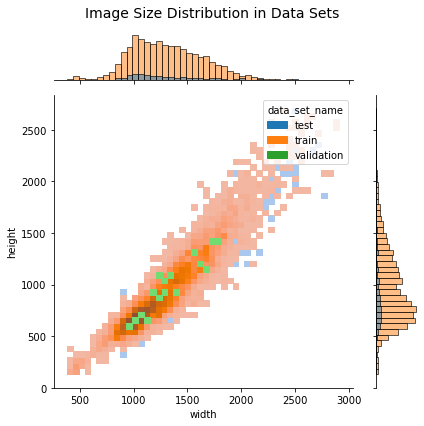

In [148]:
sns.jointplot(data=index_df, x="width", y="height", hue="data_set_name", kind="hist")
plt.suptitle("Image Size Distribution in Data Sets", size=14, y=0.98)
plt.tight_layout()
plt.savefig("../../images/image_pix_dist.png")
plt.show()